In [1]:
!pip install numpy pandas pyarrow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('process_heart.csv')

# Check preprocess daatset

In [3]:
df.shape

(1025, 27)

In [4]:
df.head()

age  resting_blood_pressure  cholestoral  maximum_heart_rate  \
0   52                     125          212                 168   
1   53                     140          203                 155   
2   70                     145          174                 125   
3   61                     148          203                 161   
4   62                     138          294                 106   

   ST_depression  major_vessels_num  target  sex_female  sex_male  \
0            1.0                  2       0       False      True   
1            3.1                  0       0       False      True   
2            2.6                  0       0       False      True   
3            0.0                  1       0       False      True   
4            1.9                  3       0        True     False   

   chest_pain_type_asymptomatic  ...  resting_electrocardiographic_normal  \
0                         False  ...                                False   
1                         False  ...                                 True   
2                         False  ...                                False   
3                         False  ...                                False   
4                         False  ...                                False   

   exercise_induced_angina_no  exercise_induced_angina_yes  \
0                        True                        False   
1                       False                         True   
2                       False                         True   
3                        True                        False   
4                        True                        False   

   ST_slope_downsloping  ST_slope_flat  ST_slope_upsloping  \
0                  True          False               False   
1                 False          False                True   
2                 False          False                True   
3                  True          False               False   
4                 False           True               False   

   thalassemia_fixed defect  thalassemia_normal  \
0                     False               False   
1                     False               False   
2                     False               False   
3                     False               False   
4                      True               False   

   thalassemia_reversable defect  thalassemia_unknown  
0                           True                False  
1                           True                False  
2                           True                False  
3                           True                False  
4                          False                False  

[5 rows x 27 columns]

# Divide feature columns and label columns

In [5]:
X = df.drop('target', axis=1)
X.shape

(1025, 26)

In [6]:
y = df['target']
y.shape

(1025,)

In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Divide training set and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape

(820, 26)

In [9]:
X_test.shape

(205, 26)

In [10]:
y_train.shape

(820,)

In [11]:
y_test.shape

(205,)

In [12]:
X_test.head()

age  resting_blood_pressure  cholestoral  maximum_heart_rate  \
620   57                     152          274                  88   
181   64                     110          211                 144   
546   70                     130          322                 109   
618   49                     130          266                 171   
822   60                     130          253                 144   

     ST_depression  major_vessels_num  sex_female  sex_male  \
620            1.2                  1       False      True   
181            1.8                  0       False      True   
546            2.4                  3       False      True   
618            0.6                  0       False      True   
822            1.4                  1       False      True   

     chest_pain_type_asymptomatic  chest_pain_type_atypical angina  ...  \
620                         False                            False  ...   
181                          True                            False  ...   
546                         False                            False  ...   
618                         False                             True  ...   
822                         False                            False  ...   

     resting_electrocardiographic_normal  exercise_induced_angina_no  \
620                                False                       False   
181                                 True                       False   
546                                 True                        True   
618                                False                        True   
822                                False                       False   

     exercise_induced_angina_yes  ST_slope_downsloping  ST_slope_flat  \
620                         True                 False           True   
181                         True                 False           True   
546                        False                 False           True   
618                        False                  True          False   
822                         True                  True          False   

     ST_slope_upsloping  thalassemia_fixed defect  thalassemia_normal  \
620               False                     False               False   
181               False                      True               False   
546               False                      True               False   
618               False                      True               False   
822               False                     False               False   

     thalassemia_reversable defect  thalassemia_unknown  
620                           True                False  
181                          False                False  
546                          False                False  
618                          False                False  
822                           True                False  

[5 rows x 26 columns]

# Construct a random forest classification model and train the model on the training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=5)

# Visualizing a Decision Tree for Random Forest Classification Models

In [14]:
len(model.estimators_)

100

In [15]:
estimator = model.estimators_[7]
estimator

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=2059200585)

In [16]:
!pip install ipython

In [17]:
feature_names = X_train.columns
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'No Disease'
y_train_str[y_train_str == '1'] = 'Disease'
y_train_str = y_train_str.values

from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', feature_names=feature_names, class_names=y_train_str, 
                rounded=True, proportion=True, label='root', precision=2, filled=True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename='tree.png')

In [18]:
# import eli5
# eli5.show_weights(estimator, feature_names=feature_names.to_list())

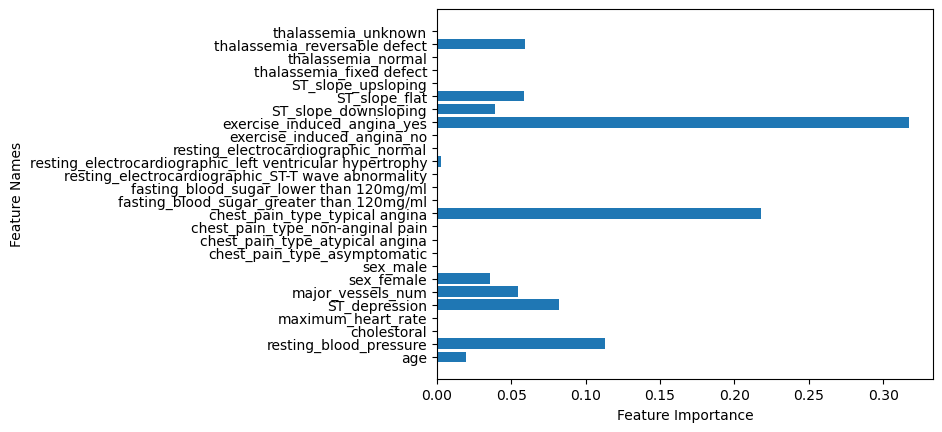

In [19]:
importances = estimator.feature_importances_
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.show()

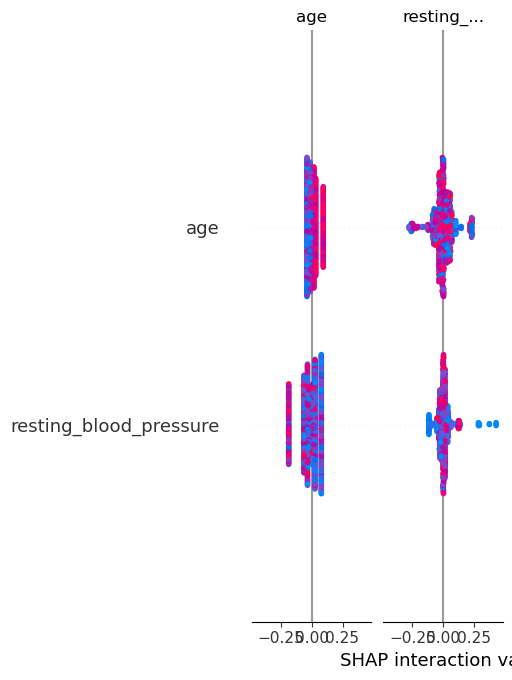

In [20]:
import shap
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [21]:
model.feature_importances_

array([0.04417366, 0.03402927, 0.03542307, 0.08533408, 0.10876267,
       0.10716851, 0.02305579, 0.02307514, 0.00651008, 0.00505886,
       0.01496667, 0.14921188, 0.00386146, 0.00385076, 0.00707034,
       0.0007272 , 0.00499941, 0.04103397, 0.06133566, 0.02703888,
       0.02179393, 0.00140955, 0.11178019, 0.00323068, 0.07469193,
       0.00040635])

In [22]:
print('Feature ranking:')
feature_name = X_test.columns
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::1]

for index in indices:
    print("feature %s (%f)" %(feature_name[index], feature_importances[index]))

Feature ranking:
feature thalassemia_unknown (0.000406)
feature resting_electrocardiographic_left ventricular hypertrophy (0.000727)
feature ST_slope_upsloping (0.001410)
feature thalassemia_normal (0.003231)
feature fasting_blood_sugar_lower than 120mg/ml (0.003851)
feature fasting_blood_sugar_greater than 120mg/ml (0.003861)
feature resting_electrocardiographic_normal (0.004999)
feature chest_pain_type_atypical angina (0.005059)
feature chest_pain_type_asymptomatic (0.006510)
feature resting_electrocardiographic_ST-T wave abnormality (0.007070)
feature chest_pain_type_non-anginal pain (0.014967)
feature ST_slope_flat (0.021794)
feature sex_female (0.023056)
feature sex_male (0.023075)
feature ST_slope_downsloping (0.027039)
feature resting_blood_pressure (0.034029)
feature cholestoral (0.035423)
feature exercise_induced_angina_no (0.041034)
feature age (0.044174)
feature exercise_induced_angina_yes (0.061336)
feature thalassemia_reversable defect (0.074692)
feature maximum_heart_rate

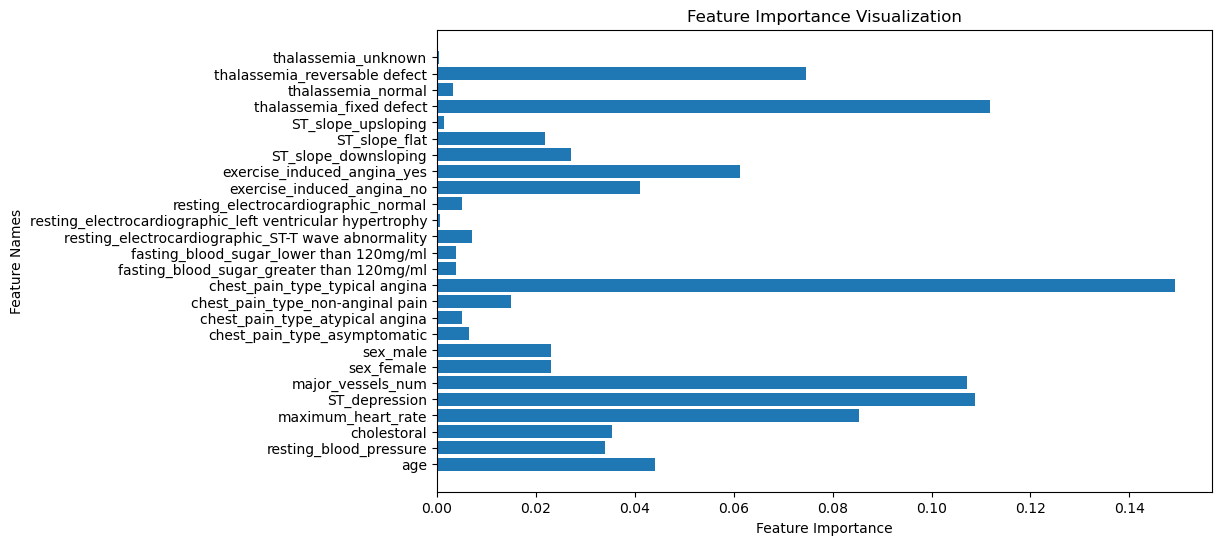

In [23]:
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance Visualization")
plt.show()

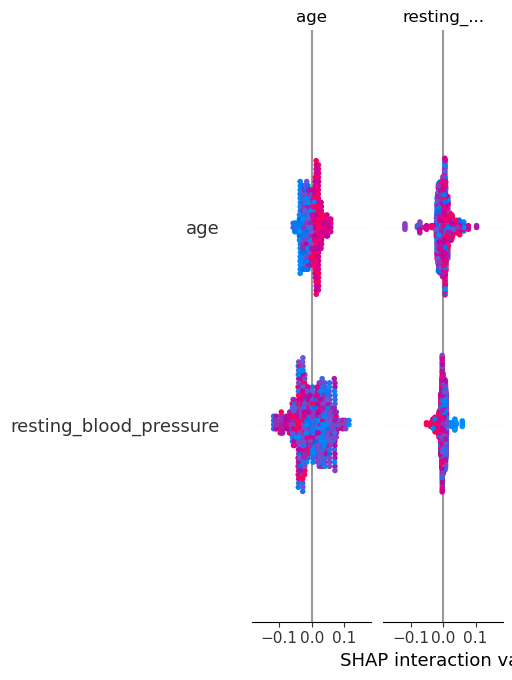

In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

In [25]:
for name, importance in zip(feature_names, model.feature_importances_):
    print(f"Feature: {name}, Importance: {importance:.4f}")

Feature: age, Importance: 0.0442
Feature: resting_blood_pressure, Importance: 0.0340
Feature: cholestoral, Importance: 0.0354
Feature: maximum_heart_rate, Importance: 0.0853
Feature: ST_depression, Importance: 0.1088
Feature: major_vessels_num, Importance: 0.1072
Feature: sex_female, Importance: 0.0231
Feature: sex_male, Importance: 0.0231
Feature: chest_pain_type_asymptomatic, Importance: 0.0065
Feature: chest_pain_type_atypical angina, Importance: 0.0051
Feature: chest_pain_type_non-anginal pain, Importance: 0.0150
Feature: chest_pain_type_typical angina, Importance: 0.1492
Feature: fasting_blood_sugar_greater than 120mg/ml, Importance: 0.0039
Feature: fasting_blood_sugar_lower than 120mg/ml, Importance: 0.0039
Feature: resting_electrocardiographic_ST-T wave abnormality, Importance: 0.0071
Feature: resting_electrocardiographic_left ventricular hypertrophy, Importance: 0.0007
Feature: resting_electrocardiographic_normal, Importance: 0.0050
Feature: exercise_induced_angina_no, Importan

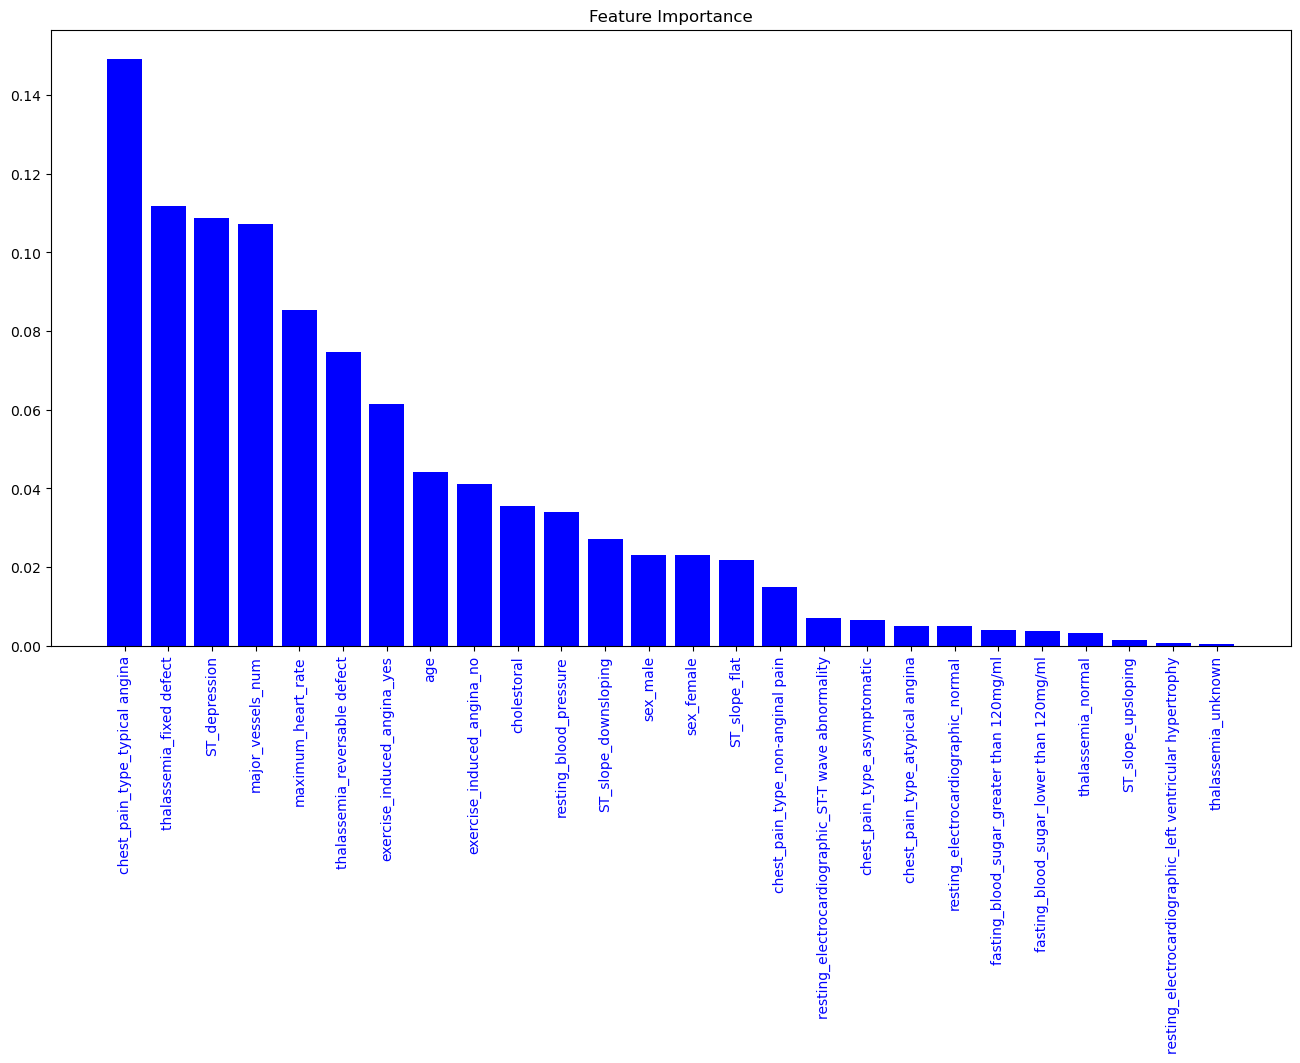

In [26]:
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(16, 8))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_name)[indices], color='b', rotation=90)
plt.show(block=True) 